<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


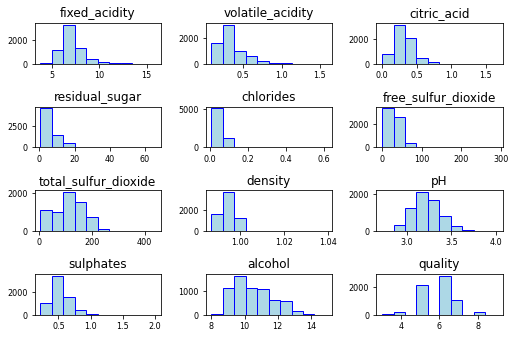

In [2]:
# 載入相關的程式庫
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


### 利用 PANDAS 取得酒的品質資料 
df_red = pd.read_csv("winequality_red.csv")
df_white = pd.read_csv("winequality_white.csv")

#資料整理
df_red["color"] = "R"
df_white["color"] = "W"

#整合紅酒與白酒的資料
df_all=pd.concat([df_red,df_white],axis=0)

# 檢查合併後的資料集
df_all.head()

df_all.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid',
                       'volatile acidity':'volatile_acidity','residual sugar':'residual_sugar',
                       'free sulfur dioxide':'free_sulfur_dioxide',
                       'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
# 檢查合併後的資料集
df_all.head()

#處理缺失值
df = pd.get_dummies(df_all, columns=["color"])
df_all.isnull().sum()

#可以使用 info() 方法瞭解有關資料集屬性的更多資訊。特別是行和列的數量、列名稱、它們的數據類型和空值數。
df_all.info()

#要瞭解數據集的統計摘要,即記錄數、平均值、標準差、最小值和最大值,我們使用描述()。
df_all.describe()

#可視化所有數值數據。在垂直軸上計數,在水平軸上使用值範圍。hist 函數通過將所有屬性繪製在一起使操作變得簡單。
df_all.hist(bins=10, color='lightblue',edgecolor='blue',linewidth=1.0,
          xlabelsize=8, ylabelsize=8, grid=False)    

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

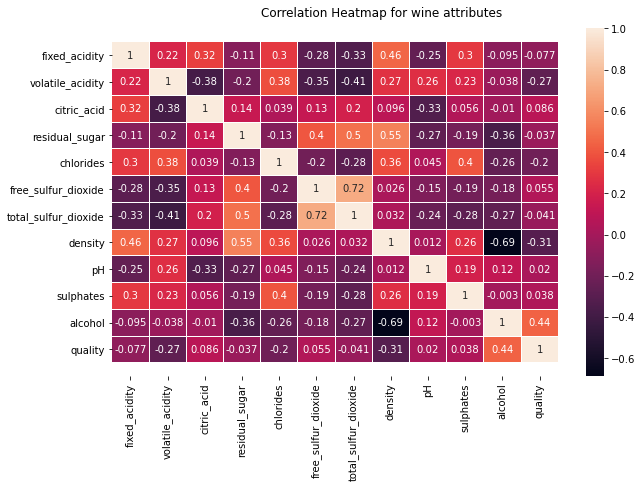

In [8]:
#Plotting heatmap
f, ax = plt.subplots(figsize=(10, 6))
b = sns.heatmap(df_all.corr(), annot=True, linewidths=.05, ax=ax)
f.subplots_adjust(top=0.93)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
title= f.suptitle('Correlation Heatmap for wine attributes', fontsize=12)


C:\Users\a0954\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\a0954\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\a0954\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


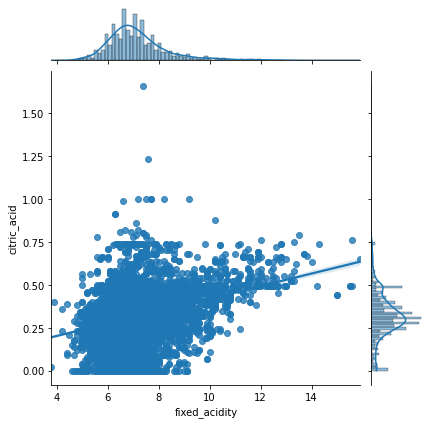

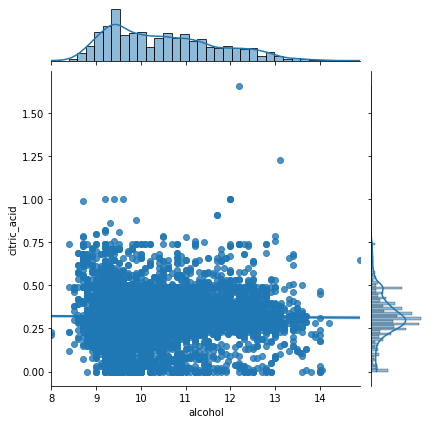

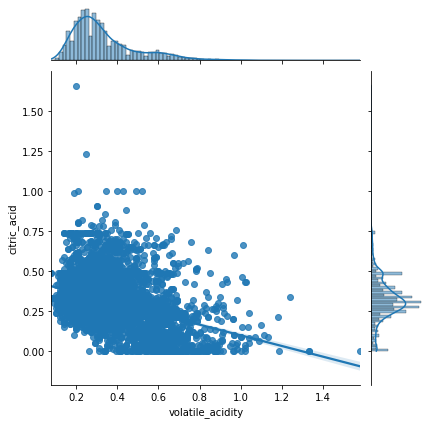

In [9]:
#Plotting Jointplot, 使用 'reg'== regression 回歸線繪製關係圖
a = sns.jointplot("fixed_acidity","citric_acid",data = df_all,kind ='reg', color = None)
b = sns.jointplot("alcohol", "citric_acid", data = df_all, kind = 'reg')
c = sns.jointplot("volatile_acidity", "citric_acid", data = df_all, kind = 'reg')

In [ ]:
#展示分類數據
#Swarm沿分類軸(質量)調整記錄。這種繪圖將記錄分別標記,而不會重疊。這就是為什麼它最適合小型數據集的原因。在此圖表中,您可以看到硫酸鹽的數量,根據品質。品質值為 6 的硫酸鹽密度最高,品質等級為 9 和 3 的最低

#在此一區域寫下程式碼

f,ax = plt.subplots(figsize=(12, 4))

p = sns.catplot(x='quality', y='sulphates', kind = 'swarm', data= df_all,ax=ax, palette= 'GnBu_d')

p.show()

In [ ]:
'''
PairGrid 允許我們使用相同的繪圖類型繪製子圖網格來視覺化數據。
它形成子圖的矩陣。它有時也被稱為"散點圖矩陣"。
對網格的用法與分面網格類似。首先初始化網格,然後傳遞繪圖函數。
'''

#在此一區域寫下程式碼
#設定底圖樣式
sns.set(style="white")

#利用PairGrid 繪製對角圖
g = sns.PairGrid(df_all, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")
g.map_diag(sns.kdeplot, lw=2)
